# Overlay plots

Here we plot the major base frequency for different time points.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
%matplotlib inline

# Obtaining the sequence annotation

In [2]:
begins=[]
ends=[]
names =[]
with open ("sequence.gb") as f:
    in_pep = False
    for l in f:
        if "mat_peptide" in l:
            begins.append(int(l.split()[1].split("..")[0]))
            ends.append(int(l.split()[1].split("..")[1]))
            in_pep = True
        elif in_pep :
            names.append(l.split("=")[1])
            in_pep = False
            
print(begins)
print(ends)
print(names)

[108, 474, 753, 978, 2490, 3546, 4224, 4614, 6465, 6846, 6915, 7668]
[473, 752, 977, 2489, 3545, 4223, 4613, 6464, 6845, 6914, 7667, 10376]
['"capsid"\n', '"propeptide"\n', '"membrane"\n', '"envelope"\n', '"NS1"\n', '"NS2A"\n', '"NS2B"\n', '"NS3"\n', '"NS4A"\n', '"2K"\n', '"NS4B"\n', '"NS5"\n']


# Functions to plot interesting positions and gene boundaries

In [3]:
# Interesting positions
positions=[316,1670,1785,2340,5935,7172,8449,9165]
def plot_positions():
    for x in positions:
        plt.axvline(x=x, linewidth=1, linestyle=':')
        
def plot_genes():
    for i in range(len(begins)):
        plt.plot([begins[i], begins[i]], [0.99,1.0], linewidth=2, linestyle='-', color="black")
        if i%2==0:
            plt.text (begins[i] + ((ends[i] - begins[i])/10), 1.005, (names[i].replace('"', ''))[0:3], size='xx-small')
        else:
            plt.text (begins[i] + ((ends[i] - begins[i])/10), 1.015, (names[i].replace('"', ''))[0:3], size='xx-small')
    plt.plot([ends[-1], ends[-1]], [0.99,1.0], linewidth=2, linestyle='-', color="black")

# Overlay plot, control, replicate A

In [4]:
# Control runs, replicate A
DD3_A = pd.read_csv ("HV5GLBCXY_ZIKV_17s006139-1-1_DREUX_lane1DD3A_1_sequence.txt.assembled.fastq_mapped_AA.csv", na_values=" -nan")
DD6_A = pd.read_csv ("HV5GLBCXY_ZIKV_17s006139-1-1_DREUX_lane1DD6A_1_sequence.txt.assembled.fastq_mapped_AA.csv", na_values=" -nan")
DD9_A = pd.read_csv ("HV5GLBCXY_ZIKV_17s006139-1-1_DREUX_lane1DD9A_1_sequence.txt.assembled.fastq_mapped_AA.csv", na_values=" -nan")
DD12_A = pd.read_csv ("HV5GLBCXY_ZIKV_17s006139-1-1_DREUX_lane1DD12A_1_sequence.txt.assembled.fastq_mapped_AA.csv", na_values=" -nan")
DD24_A = pd.read_csv ("HV5GLBCXY_ZIKV_17s006139-1-1_DREUX_lane1DD24A_1_sequence.txt.assembled.fastq_mapped_AA.csv", na_values=" -nan")
DD51_A = pd.read_csv ("HV5GLBCXY_ZIKV_17s006139-1-1_DREUX_lane1DD51A_1_sequence.txt.assembled.fastq_mapped_AA.csv", na_values=" -nan")

In [5]:
DD3_A.describe(include='all')

,Unnamed: 0,Unnamed: 0.1,As,Cs,Gs,Ns,Ts,coverage,expected_number_of_errors,majorbase_ratio,...,secondbase,secondbase_ratio,indels,qAs,qCs,qGs,qNs,qTs,consensus_aa,secondbase_aa
count,10807.000000,10807.000000,10807.000000,10807.000000,10807.000000,10807.000000,10807.000000,10807.000000,10804.000000,10804.000000,...,10807.000000,10804.000000,10807.0,10807.000000,10807.000000,10807.000000,10807.0,10807.000000,10269,10269
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,22
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,L,L
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,939,887
mean,5403.000000,5403.000000,11299.397243,9240.678819,12376.406773,0.658092,8785.181364,41702.322291,14.613136,0.995567,...,129.244379,0.003087,0.0,3.650977,3.394751,4.174169,0.0,2.973955,NaN,NaN
std,3119.856514,3119.856514,20350.779172,19023.057686,21358.336850,0.899012,18437.375934,17154.159493,6.486028,0.002482,...,121.902565,0.002290,0.0,5.528818,5.762851,6.161381,0.0,4.989614,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000100,0.826975,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,NaN,NaN
25%,2701.500000,2701.500000,22.000000,26.000000,27.000000,0.000000,20.000000,29410.500000,10.286680,0.994281,...,64.000000,0.001701,0.0,0.358839,0.452419,0.491572,0.0,0.293292,NaN,NaN
50%,5403.000000,5403.000000,55.000000,46.000000,51.000000,0.000000,73.000000,38820.000000,13.481478,0.995583,...,108.000000,0.003020,0.0,0.759302,0.734745,0.849290,0.0,0.697536,NaN,NaN
75%,8104.500000,8104.500000,21912.000000,113.000000,25257.500000,1.000000,287.000000,52799.500000,17.991054,0.997119,...,171.000000,0.004252,0.0,5.756053,1.624548,7.672840,0.0,1.877887,NaN,NaN


In [6]:
DD3_A['majorbase_ratio'] = DD3_A ['majorbases']/DD3_A ['coverage']
DD6_A['majorbase_ratio'] = DD6_A ['majorbases']/DD6_A ['coverage']
DD9_A['majorbase_ratio'] = DD9_A ['majorbases']/DD9_A ['coverage']
DD12_A['majorbase_ratio'] = DD12_A ['majorbases']/DD12_A ['coverage']
DD24_A['majorbase_ratio'] = DD24_A ['majorbases']/DD24_A ['coverage']
DD51_A['majorbase_ratio'] = DD51_A ['majorbases']/DD51_A ['coverage']
overlay_table =  pd.DataFrame ({'position':DD3_A['position'], 'DD3_A':DD3_A ['majorbase_ratio'], 'DD6_A':DD6_A ['majorbase_ratio'],'DD9_A':DD9_A ['majorbase_ratio'],'DD12_A':DD12_A ['majorbase_ratio'], 'DD24_A':DD24_A ['majorbase_ratio'], 'DD51_A':DD51_A ['majorbase_ratio']})
siz = len(DD3_A ['coverage'])
sample = siz*["DD3A"]+siz*["DD6A"]+siz*["DD9A"]+siz*["DD12A"]+siz*["DD24A"]+siz*["DD51A"]

overlay_table_concat = pd.DataFrame ({'position':pd.concat([DD3_A['position'],DD6_A['position'],DD9_A['position'],DD12_A['position'],DD24_A['position'],DD51_A['position']]), 'majorbase_ratio':pd.concat([DD3_A ['majorbase_ratio'],DD6_A ['majorbase_ratio'], DD9_A ['majorbase_ratio'],DD12_A ['majorbase_ratio'], DD24_A ['majorbase_ratio'], DD51_A ['majorbase_ratio'] ]), 'sample':sample})



In [7]:
sns.set_palette("hls")
sns.set_context("poster")

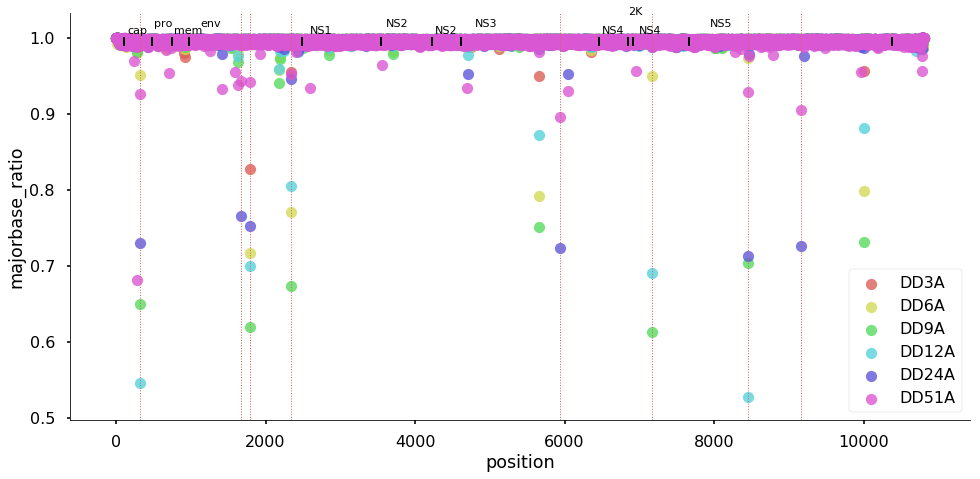

In [8]:
sns.lmplot( x="position", y="majorbase_ratio", data=overlay_table_concat, fit_reg=False, hue='sample', legend=False, size=7, aspect=2)
plt.legend(loc='lower right')
plot_positions()
plot_genes()

## Same thing, without sample at 51 days

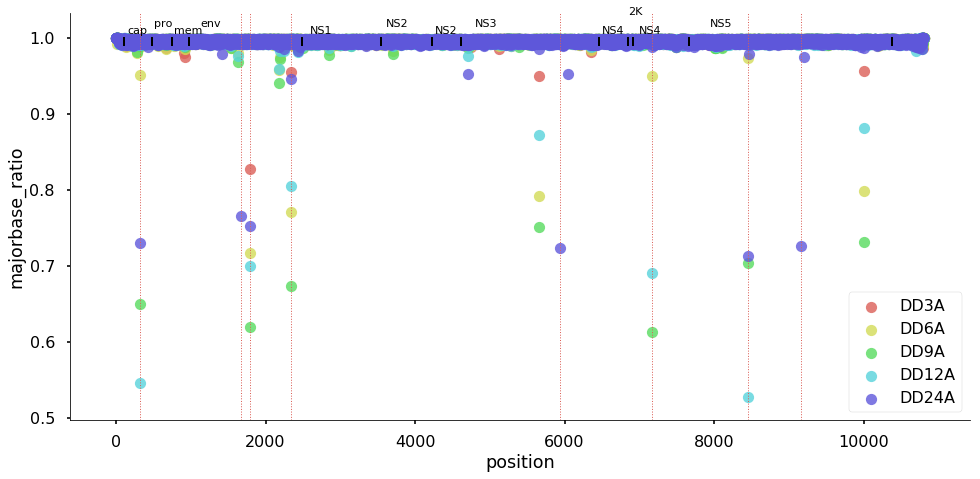

In [9]:
overlay_table_concat_no51 = overlay_table_concat.loc[overlay_table_concat['sample']!= "DD51A"]
sns.lmplot( x="position", y="majorbase_ratio", data= overlay_table_concat_no51, fit_reg=False, hue='sample', legend=False, size=7, aspect=2)
plt.legend(loc='lower right')
plot_positions()
plot_genes()

## Diversity through time plot, replicate A

Median values of the diversity per sample:
[ 0.0047229   0.00473106  0.0044167   0.0050112   0.00438015  0.00428148]
Mean values of the diversity per sample:
[ 0.00488189  0.00483917  0.00443269  0.00511921  0.0044505   0.0044909 ]


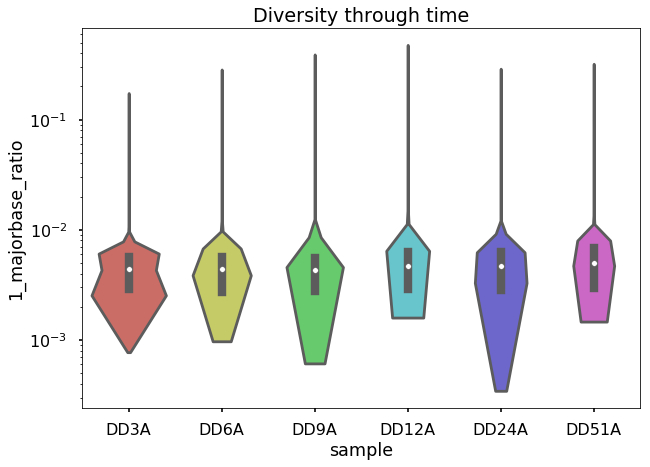

In [10]:
overlay_table_concat['1_majorbase_ratio'] = 1.0 - overlay_table_concat['majorbase_ratio']

f, ax = plt.subplots(figsize=(10, 7))
ax.set(yscale="log")
sns.violinplot(x='sample', y="1_majorbase_ratio", data=overlay_table_concat,  ax=ax, bw=0.2)

# giving title to the plot
plt.title("Diversity through time");

medians = overlay_table_concat.groupby(['sample'])['1_majorbase_ratio'].median().values
print("Median values of the diversity per sample:" )
print(medians)
means = overlay_table_concat.groupby(['sample'])['1_majorbase_ratio'].mean().values
print("Mean values of the diversity per sample:" )
print(means)


## Same thing, Sample D

In [11]:
# Control runs, replicate D
DD3_D = pd.read_csv ("HV5GLBCXY_ZIKV_17s006139-1-1_DREUX_lane1DD3D_1_sequence.txt.assembled.fastq_mapped_AA.csv")
DD6_D = pd.read_csv ("HV5GLBCXY_ZIKV_17s006139-1-1_DREUX_lane1DD6D_1_sequence.txt.assembled.fastq_mapped_AA.csv")
DD9_D = pd.read_csv ("HV5GLBCXY_ZIKV_17s006139-1-1_DREUX_lane1DD9D_1_sequence.txt.assembled.fastq_mapped_AA.csv")
DD12_D = pd.read_csv ("HV5GLBCXY_ZIKV_17s006139-1-1_DREUX_lane1DD12D_1_sequence.txt.assembled.fastq_mapped_AA.csv")
DD24_D = pd.read_csv ("HV5GLBCXY_ZIKV_17s006139-1-1_DREUX_lane1DD24D_1_sequence.txt.assembled.fastq_mapped_AA.csv")

In [12]:
DD3_D['majorbase_ratio'] = DD3_D ['majorbases']/DD3_D ['coverage']
DD6_D['majorbase_ratio'] = DD6_D ['majorbases']/DD6_D ['coverage']
DD9_D['majorbase_ratio'] = DD9_D ['majorbases']/DD9_D ['coverage']
DD12_D['majorbase_ratio'] = DD12_D ['majorbases']/DD12_D ['coverage']
DD24_D['majorbase_ratio'] = DD24_D ['majorbases']/DD24_D ['coverage']
overlay_table =  pd.DataFrame ({'position':DD3_D['position'], 'DD3_D':DD3_D ['majorbase_ratio'], 'DD6_D':DD6_D ['majorbase_ratio'],'DD9_D':DD9_D ['majorbase_ratio'],'DD12_D':DD12_D ['majorbase_ratio'],'DD24_D':DD24_D ['majorbase_ratio']})
siz = len(DD3_D ['coverage'])
sample = siz*["DD3D"]+siz*["DD6D"]+siz*["DD9D"]+siz*["DD12D"]+siz*["DD51D"]

overlay_table_concat = pd.DataFrame ({'position':pd.concat([DD3_D['position'],DD6_D['position'],DD9_D['position'],DD12_D['position'],DD24_D['position']]), 'majorbase_ratio':pd.concat([DD3_D ['majorbase_ratio'],DD6_D ['majorbase_ratio'], DD9_D ['majorbase_ratio'],DD12_D ['majorbase_ratio'], DD24_D ['majorbase_ratio'] ]), 'sample':sample})



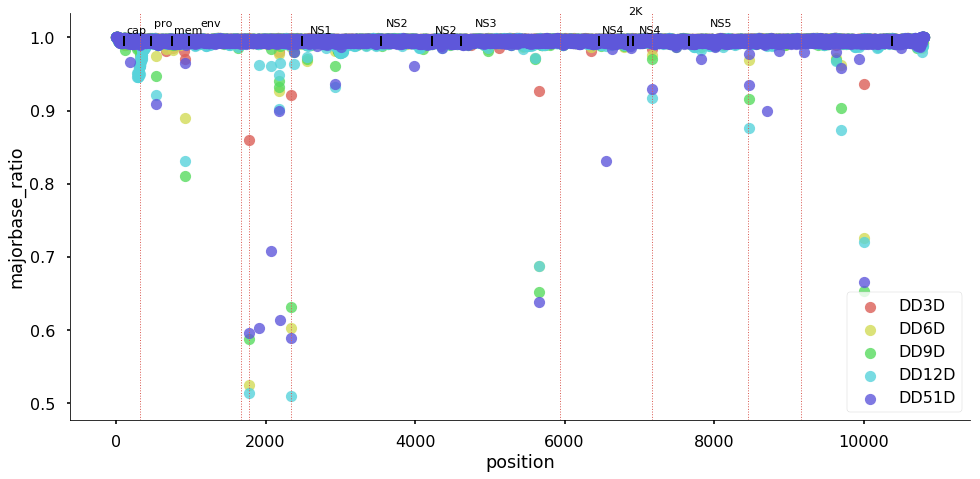

In [13]:
sns.lmplot( x="position", y="majorbase_ratio", data=overlay_table_concat, fit_reg=False, hue='sample', legend=False, size=7, aspect=2)
plt.legend(loc='lower right')
plot_positions()
plot_genes()

## Diversity through time plot, replicate D

Median values of the diversity per sample:
[ 0.00492772  0.00425988  0.00479277  0.00453277  0.00483264]
Mean values of the diversity per sample:
[ 0.00536118  0.00423647  0.00507986  0.0046463   0.00506487]


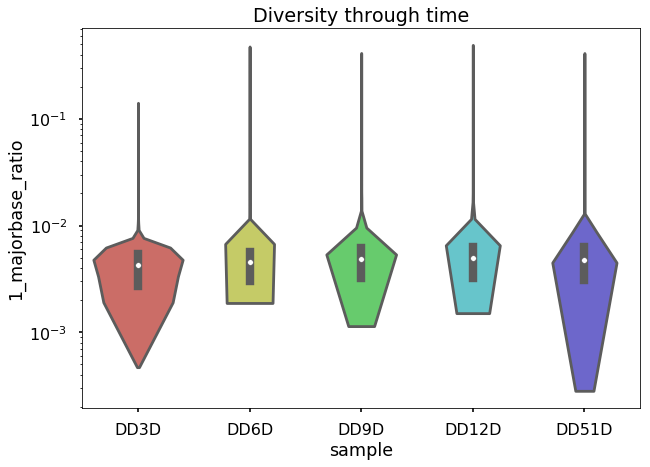

In [14]:
overlay_table_concat['1_majorbase_ratio'] = 1.0 - overlay_table_concat['majorbase_ratio']

f, ax = plt.subplots(figsize=(10, 7))
ax.set(yscale="log")
sns.violinplot(x='sample', y="1_majorbase_ratio", data=overlay_table_concat,  ax=ax, bw=0.2)

# giving title to the plot
plt.title("Diversity through time");

medians = overlay_table_concat.groupby(['sample'])['1_majorbase_ratio'].median().values
print("Median values of the diversity per sample:" )
print(medians)
means = overlay_table_concat.groupby(['sample'])['1_majorbase_ratio'].mean().values
print("Mean values of the diversity per sample:" )
print(means)


## Same thing, sample E

In [15]:
# Control runs, replicate E
DD6_E = pd.read_csv ("HV5GLBCXY_ZIKV_17s006139-1-1_DREUX_lane1DD6E_1_sequence.txt.assembled.fastq_mapped_AA.csv")
DD9_E = pd.read_csv ("HV5GLBCXY_ZIKV_17s006139-1-1_DREUX_lane1DD9E_1_sequence.txt.assembled.fastq_mapped_AA.csv")


In [16]:
DD6_E['majorbase_ratio'] = DD6_E ['majorbases']/DD6_E ['coverage']
DD9_E['majorbase_ratio'] = DD9_E ['majorbases']/DD9_E ['coverage']
overlay_table =  pd.DataFrame ({'position':DD6_E['position'], 'DD6_E':DD6_E ['majorbase_ratio'], 'DD9_E':DD9_E ['majorbase_ratio']})
siz = len(DD6_E ['coverage'])
sample = siz*["DD6E"]+siz*["DD9E"]

overlay_table_concat = pd.DataFrame ({'position':pd.concat([DD6_E['position'],DD9_E['position']]), 'majorbase_ratio':pd.concat([DD6_E ['majorbase_ratio'],DD9_E ['majorbase_ratio']]), 'sample':sample})


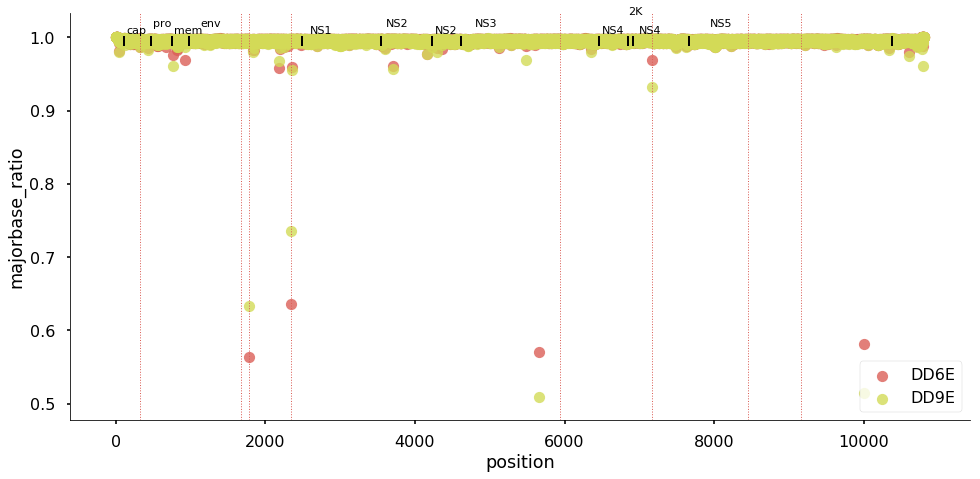

In [17]:
sns.lmplot( x="position", y="majorbase_ratio", data=overlay_table_concat, fit_reg=False, hue='sample', legend=False, size=7, aspect=2)
plt.legend(loc='lower right')
plot_positions()
plot_genes()

## Diversity through time plot, replicate E

Median values of the diversity per sample:
[ 0.00440787  0.00459268]
Mean values of the diversity per sample:
[ 0.00454974  0.00473973]


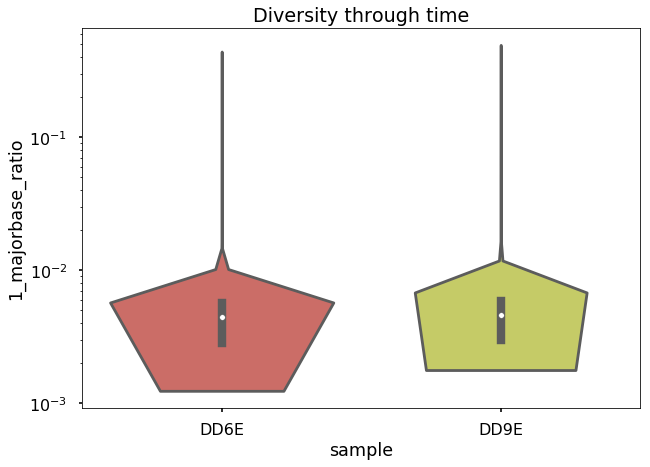

In [18]:
overlay_table_concat['1_majorbase_ratio'] = 1.0 - overlay_table_concat['majorbase_ratio']

f, ax = plt.subplots(figsize=(10, 7))
ax.set(yscale="log")
sns.violinplot(x='sample', y="1_majorbase_ratio", data=overlay_table_concat,  ax=ax, bw=0.2)

# giving title to the plot
plt.title("Diversity through time");

medians = overlay_table_concat.groupby(['sample'])['1_majorbase_ratio'].median().values
print("Median values of the diversity per sample:" )
print(medians)
means = overlay_table_concat.groupby(['sample'])['1_majorbase_ratio'].mean().values
print("Mean values of the diversity per sample:" )
print(means)

## Same thing, TLR3 activation

In [19]:
# TLR3 activation runs, replicate A
TD9_A = pd.read_csv ("HV5GLBCXY_ZIKV_17s006139-1-1_DREUX_lane1TD9A_1_sequence.txt.assembled.fastq_mapped_AA.csv")
TD12_A = pd.read_csv ("HV5GLBCXY_ZIKV_17s006139-1-1_DREUX_lane1TD12A_1_sequence.txt.assembled.fastq_mapped_AA.csv")
TD24_A = pd.read_csv ("HV5GLBCXY_ZIKV_17s006139-1-1_DREUX_lane1TD24A_1_sequence.txt.assembled.fastq_mapped_AA.csv")
TD51_A = pd.read_csv ("HV5GLBCXY_ZIKV_17s006139-1-1_DREUX_lane1TD51A_1_sequence.txt.assembled.fastq_mapped_AA.csv")

In [20]:
TD9_A['majorbase_ratio'] = TD9_A ['majorbases']/TD9_A ['coverage']
TD12_A['majorbase_ratio'] = TD12_A ['majorbases']/TD12_A ['coverage']
TD24_A['majorbase_ratio'] = TD24_A ['majorbases']/TD24_A ['coverage']
TD51_A['majorbase_ratio'] = TD51_A ['majorbases']/TD51_A ['coverage']
overlay_table =  pd.DataFrame ({'position':TD9_A['position'], 'TD9_A':TD9_A ['majorbase_ratio'], 'TD12_A':TD12_A ['majorbase_ratio'],'TD24_A':TD24_A ['majorbase_ratio'], 'TD51_A':TD51_A ['majorbase_ratio']})
siz = len(TD9_A ['coverage'])
sample = siz*["TD9A"]+siz*["TD12A"]+siz*["TD24A"]+siz*["TD51A"]

overlay_table_concat = pd.DataFrame ({'position':pd.concat([TD9_A['position'],TD12_A['position'],TD24_A['position'],TD51_A['position']]), 'majorbase_ratio':pd.concat([TD9_A['majorbase_ratio'],TD12_A['majorbase_ratio'],TD24_A['majorbase_ratio'],TD51_A['majorbase_ratio'] ]), 'sample':sample})



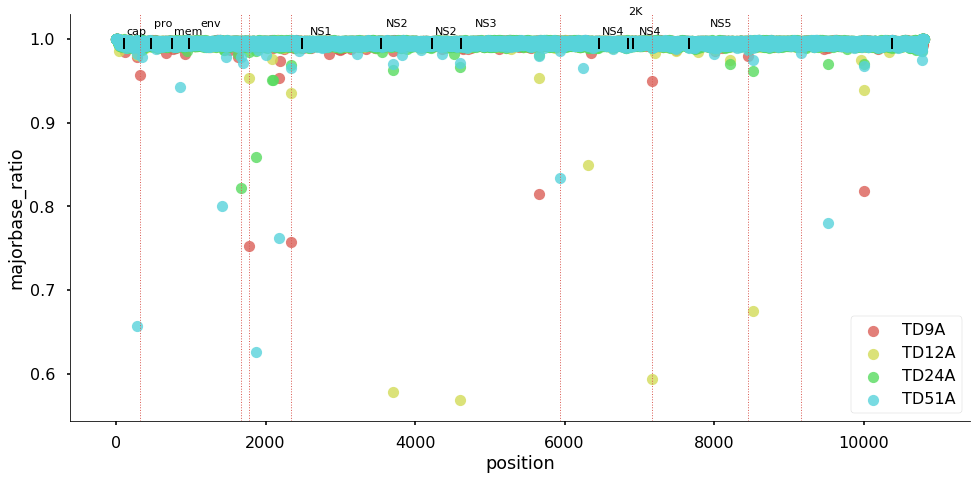

In [21]:
sns.lmplot( x="position", y="majorbase_ratio", data=overlay_table_concat, fit_reg=False, hue='sample', legend=False, size=7, aspect=2)
plt.legend(loc='lower right')
plot_positions()
plot_genes()

## Diversity through time plot, TLR3 activation

Median values of the diversity per sample:
[ 0.00494438  0.00483029  0.00461823  0.00459021]
Mean values of the diversity per sample:
[ 0.0050587   0.00487001  0.00477837  0.00466675]


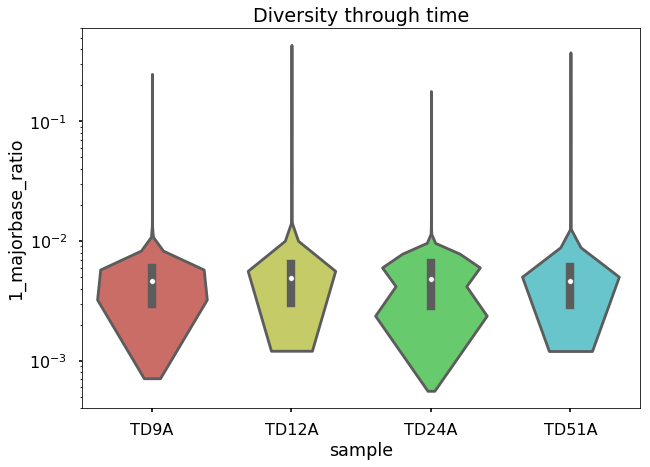

In [22]:
overlay_table_concat['1_majorbase_ratio'] = 1.0 - overlay_table_concat['majorbase_ratio']

f, ax = plt.subplots(figsize=(10, 7))
ax.set(yscale="log")
sns.violinplot(x='sample', y="1_majorbase_ratio", data=overlay_table_concat,  ax=ax, bw=0.2)

# giving title to the plot
plt.title("Diversity through time");

medians = overlay_table_concat.groupby(['sample'])['1_majorbase_ratio'].median().values
print("Median values of the diversity per sample:" )
print(medians)
means = overlay_table_concat.groupby(['sample'])['1_majorbase_ratio'].mean().values
print("Mean values of the diversity per sample:" )
print(means)

# Overlay of coverages

In [23]:
# construction of the data table
siz = len(DD3_A ['coverage'])
sample = siz*["DD3A"]+siz*["DD6A"]+siz*["DD9A"]+siz*["DD12A"]+siz*["DD24A"]+siz*["DD51A"]
overlay_table_concat_DDA = pd.DataFrame ({'position':pd.concat([DD3_A['position'],DD6_A['position'],DD9_A['position'],DD12_A['position'],DD24_A['position'],DD51_A['position']]), 'coverage':pd.concat([DD3_A ['coverage'],DD6_A ['coverage'], DD9_A ['coverage'],DD12_A ['coverage'], DD24_A ['coverage'], DD51_A ['coverage'] ]), 'sample':sample})

siz = len(DD3_D ['coverage'])
sample = siz*["DD3D"]+siz*["DD6D"]+siz*["DD9D"]+siz*["DD12D"]+siz*["DD51D"]
overlay_table_concat_DDD = pd.DataFrame ({'position':pd.concat([DD3_D['position'],DD6_D['position'],DD9_D['position'],DD12_D['position'],DD24_D['position']]), 'coverage':pd.concat([DD3_D ['coverage'],DD6_D ['coverage'], DD9_D ['coverage'],DD12_D ['coverage'], DD24_D ['coverage'] ]), 'sample':sample})

siz = len(DD6_E ['coverage'])
sample = siz*["DD6E"]+siz*["DD9E"]
overlay_table_concat_DDE = pd.DataFrame ({'position':pd.concat([DD6_E['position'],DD9_E['position']]), 'majorbase_ratio':pd.concat([DD6_E ['coverage'],DD9_E ['coverage']]), 'sample':sample})

siz = len(TD9_A ['coverage'])
sample = siz*["TD9A"]+siz*["TD12A"]+siz*["TD24A"]+siz*["TD51A"]
overlay_table_concat_TD = pd.DataFrame ({'position':pd.concat([TD9_A['position'],TD12_A['position'],TD24_A['position'],TD51_A['position']]), 'coverage':pd.concat([TD9_A['coverage'],TD12_A['coverage'],TD24_A['coverage'],TD51_A['coverage'] ]), 'sample':sample})

overlay_table_concat=pd.concat([overlay_table_concat_DDA,overlay_table_concat_DDD, overlay_table_concat_DDE, overlay_table_concat_TD])

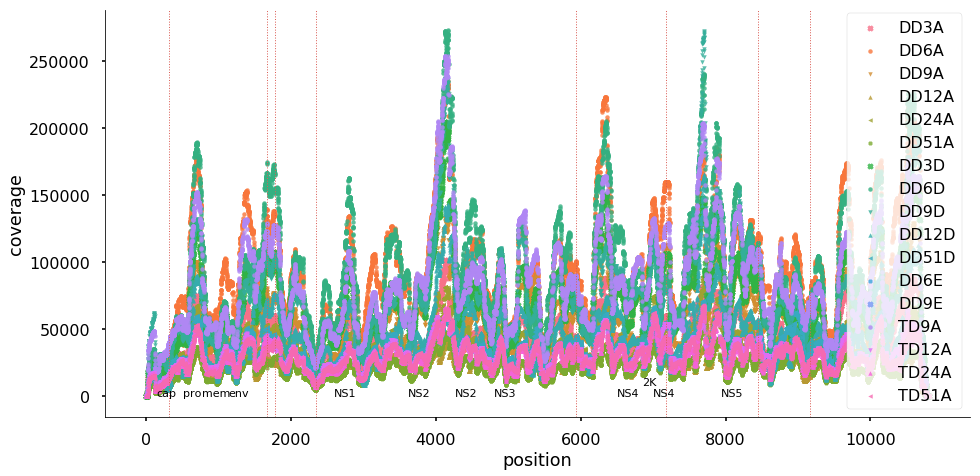

In [24]:
markers = ['x','o','v','^','<', '+', 'x','o','v','^','<', '+', 'x','o','v','^','<']
sns.lmplot( x="position", y="coverage", data=overlay_table_concat, fit_reg=False, hue='sample', legend=False, size=7, aspect=2, lowess=True, markers=markers, scatter_kws={"s": 20})
plt.legend(loc='lower right')
plot_positions()
plot_genes()

# Overlays per time point

## Time point 3

In [25]:
# construction of the data table
siz = len(DD3_A ['coverage'])
sample = len(DD3_A ['coverage'])*["DD3A"]+len(DD3_D ['coverage'])*["DD3D"]
overlay_table_concat_DD3 = pd.DataFrame ({'position':pd.concat([DD3_A['position'],DD3_D['position']]), 'majorbase_ratio':pd.concat([DD3_A ['majorbase_ratio'],DD3_D ['majorbase_ratio']]), 'sample':sample})


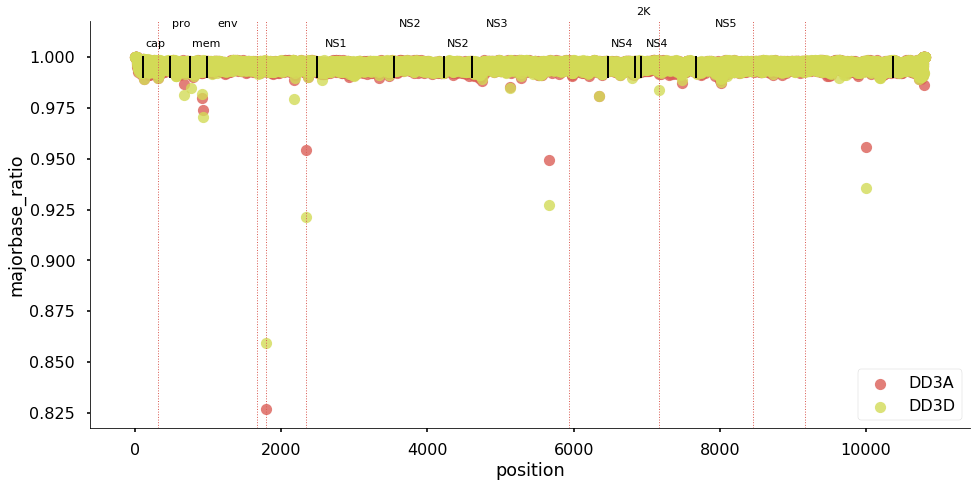

In [26]:
sns.lmplot( x="position", y="majorbase_ratio", data=overlay_table_concat_DD3, fit_reg=False, hue='sample', legend=False, size=7, aspect=2, lowess=True)
plt.legend(loc='lower right')
plot_positions()
plot_genes()

## Time point 6

In [27]:
# construction of the data table
siz = len(DD6_A ['coverage'])
sample = len(DD6_A ['coverage'])*["DD6A"]+len(DD6_D ['coverage'])*["DD6D"]+len(DD6_E ['coverage'])*["DD6E"]
overlay_table_concat_DD6 = pd.DataFrame ({'position':pd.concat([DD6_A['position'],DD6_D['position'],DD6_E['position']]), 'majorbase_ratio':pd.concat([DD6_A ['majorbase_ratio'],DD6_D ['majorbase_ratio'],DD6_E ['majorbase_ratio']]), 'sample':sample})


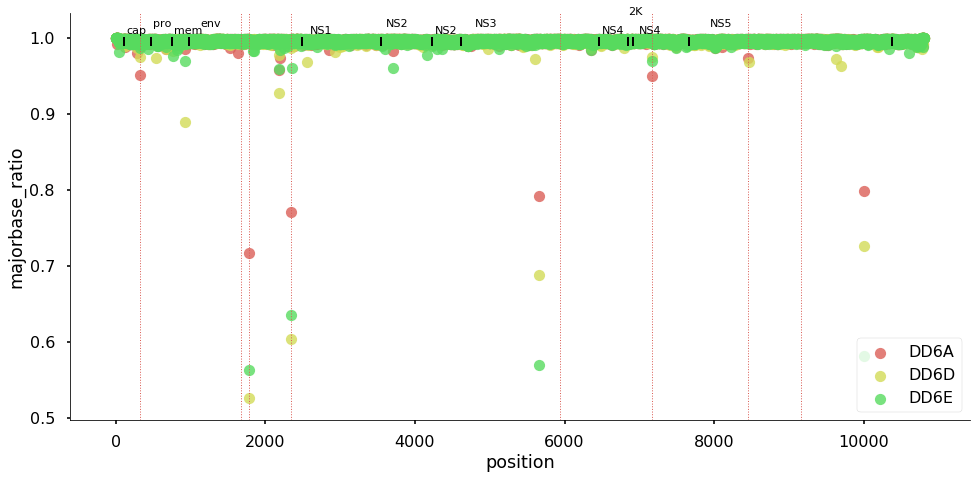

In [28]:
sns.lmplot( x="position", y="majorbase_ratio", data=overlay_table_concat_DD6, fit_reg=False, hue='sample', legend=False, size=7, aspect=2, lowess=True)
plt.legend(loc='lower right')
plot_positions()
plot_genes()

## Time point 9

In [29]:
# construction of the data table
siz = len(DD9_A ['coverage'])
sample = len(DD9_A ['coverage'])*["DD9A"]+len(DD9_D ['coverage'])*["DD9D"]+len(DD9_E ['coverage'])*["DD9E"]
overlay_table_concat_DD9 = pd.DataFrame ({'position':pd.concat([DD9_A['position'],DD9_D['position'],DD9_E['position']]), 'majorbase_ratio':pd.concat([DD9_A ['majorbase_ratio'],DD9_D ['majorbase_ratio'],DD9_E ['majorbase_ratio']]), 'sample':sample})


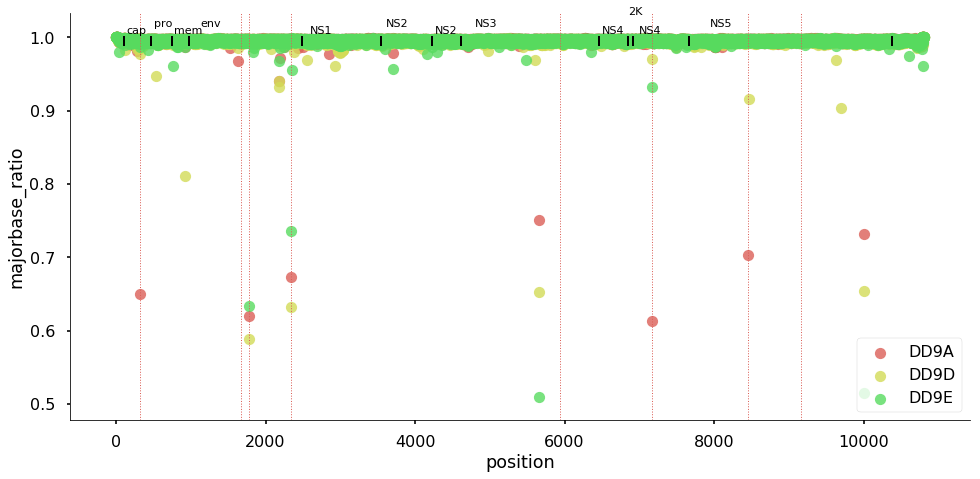

In [30]:
sns.lmplot( x="position", y="majorbase_ratio", data=overlay_table_concat_DD9, fit_reg=False, hue='sample', legend=False, size=7, aspect=2, lowess=True)
plt.legend(loc='lower right')
plot_positions()
plot_genes()

## Time point 12

In [31]:
# construction of the data table
siz = len(DD12_A ['coverage'])
sample = len(DD12_A ['coverage'])*["DD12A"]+len(DD12_D ['coverage'])*["DD12D"]
overlay_table_concat_DD12 = pd.DataFrame ({'position':pd.concat([DD12_A['position'],DD12_D['position']]), 'majorbase_ratio':pd.concat([DD12_A ['majorbase_ratio'],DD12_D ['majorbase_ratio']]), 'sample':sample})


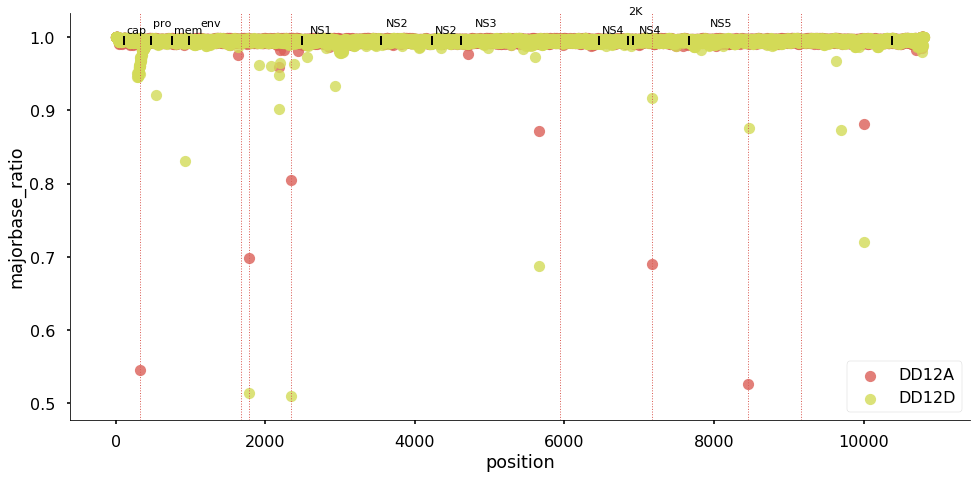

In [32]:
sns.lmplot( x="position", y="majorbase_ratio", data=overlay_table_concat_DD12, fit_reg=False, hue='sample', legend=False, size=7, aspect=2, lowess=True)
plt.legend(loc='lower right')
plot_positions()
plot_genes()

## Time point 24

In [33]:
# construction of the data table
siz = len(DD24_A ['coverage'])
sample = len(DD24_A ['coverage'])*["DD24A"]+len(DD24_D ['coverage'])*["DD24D"]
overlay_table_concat_DD24 = pd.DataFrame ({'position':pd.concat([DD24_A['position'],DD24_D['position']]), 'majorbase_ratio':pd.concat([DD24_A ['majorbase_ratio'],DD24_D ['majorbase_ratio']]), 'sample':sample})


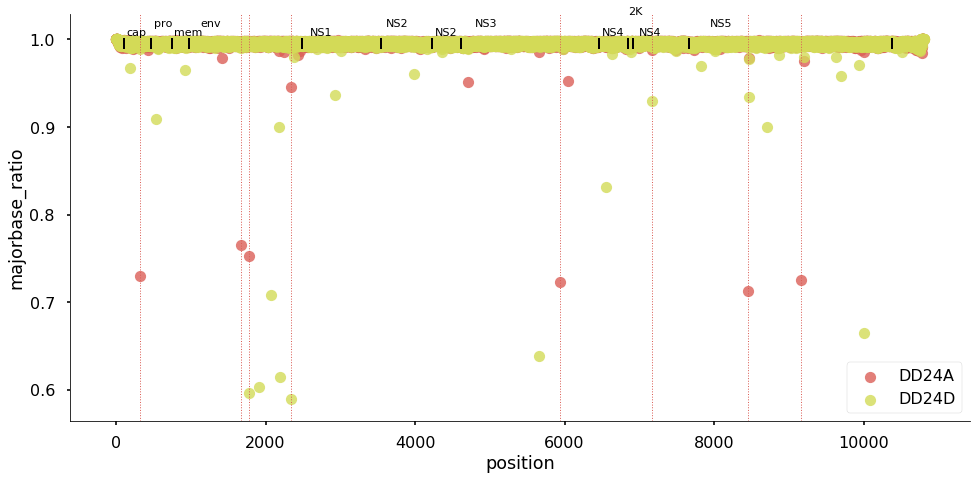

In [34]:
sns.lmplot( x="position", y="majorbase_ratio", data=overlay_table_concat_DD24, fit_reg=False, hue='sample', legend=False, size=7, aspect=2, lowess=True)
plt.legend(loc='lower right')
plot_positions()
plot_genes()

# Synonymous and non-synonymous mutations

### Experiment A, day 3

In [35]:
DD3_A['null'] = (DD3_A['secondbase_aa']).isnull()


In [36]:
def synonymous (row):
    if row['null'] or (row['consensus_aa']==row['secondbase_aa'] ):
        return "synonymous"  
    else:
        return "non-synonymous" 
DD3_A['synonymous'] = DD3_A.apply (lambda row: synonymous (row),axis=1)


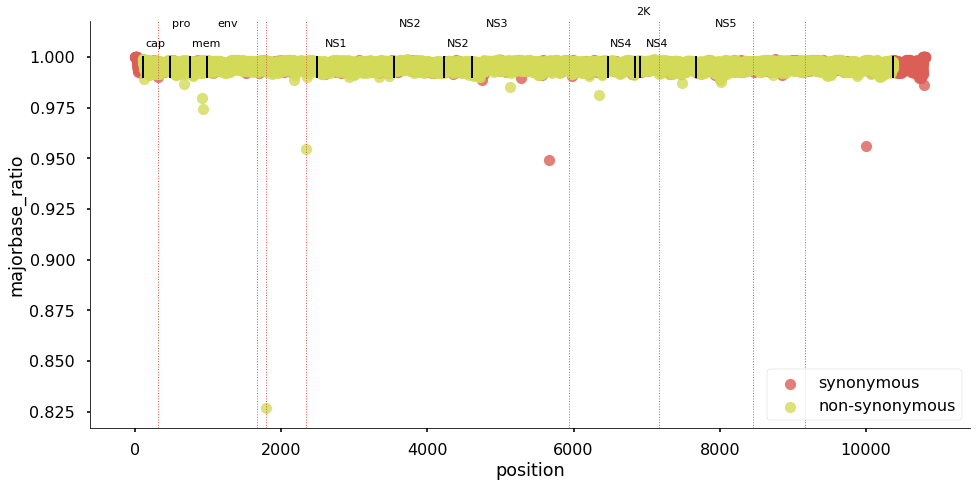

In [37]:
sns.lmplot( x="position", y="majorbase_ratio", data=DD3_A, fit_reg=False, hue='synonymous', legend=False, size=7, aspect=2) #, markers=DD3_A['synonymous'])
plt.legend(loc='lower right')
plot_positions()
plot_genes()
# giving title to the plot
#plt.title("Synonymous and non-synonymous polymorphisms, experiment A day 3");


### Experiment A, day 12

In [38]:
DD12_A['null'] = (DD12_A['secondbase_aa']).isnull()
def synonymous (row):
    if row['null'] or (row['consensus_aa']==row['secondbase_aa'] ):
        return "synonymous"  
    else:
        return "non-synonymous" 
DD12_A['synonymous'] = DD12_A.apply (lambda row: synonymous (row),axis=1)


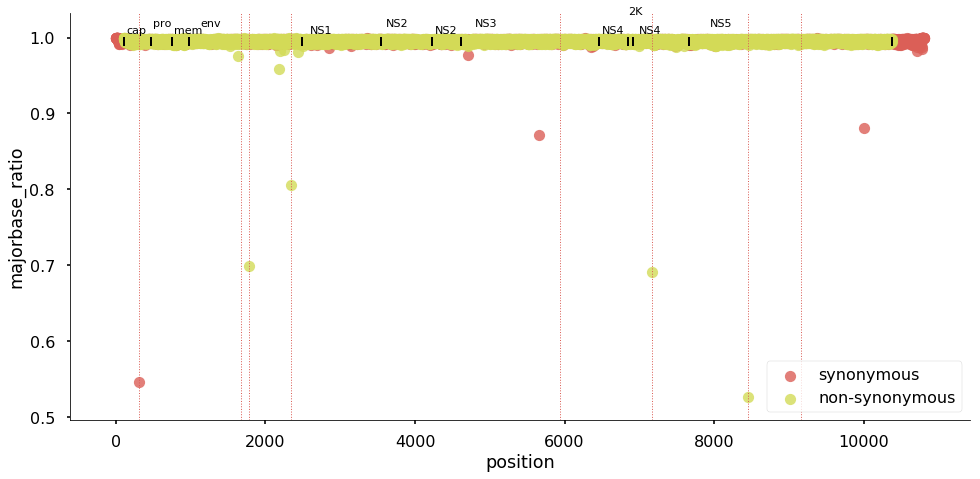

In [39]:
sns.lmplot( x="position", y="majorbase_ratio", data=DD12_A, fit_reg=False, hue='synonymous', legend=False, size=7, aspect=2) #, markers=DD3_A['synonymous'])
plt.legend(loc='lower right')
plot_positions()
plot_genes()

### Experiment A, day 24

In [40]:
DD24_A['null'] = (DD24_A['secondbase_aa']).isnull()
def synonymous (row):
    if row['null'] or (row['consensus_aa']==row['secondbase_aa'] ):
        return "synonymous"  
    else:
        return "non-synonymous"
DD24_A['synonymous'] = DD24_A.apply (lambda row: synonymous (row),axis=1)


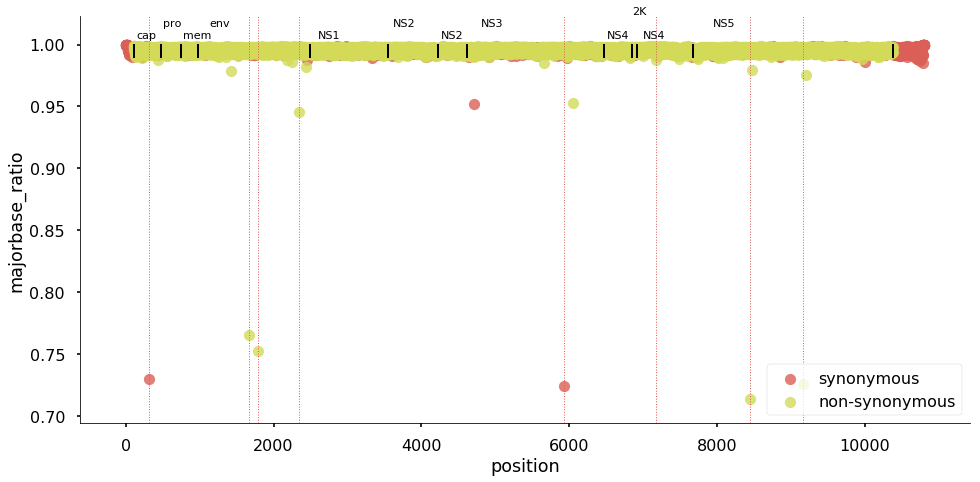

In [41]:
sns.lmplot( x="position", y="majorbase_ratio", data=DD24_A, fit_reg=False, hue='synonymous', legend=False, size=7, aspect=2) #, markers=DD3_A['synonymous'])
plt.legend(loc='lower right')
plot_positions()
plot_genes()
# giving title to the plot
#plt.title("Synonymous and non-synonymous polymorphisms, experiment A day 3");


### Experiment A, day 51

In [42]:
DD51_A['null'] = (DD51_A['secondbase_aa']).isnull()
def synonymous (row):
    if row['null'] or (row['consensus_aa']==row['secondbase_aa'] ):
        return "synonymous"  
    else:
        return "non-synonymous"
DD51_A['synonymous'] = DD51_A.apply (lambda row: synonymous (row),axis=1)


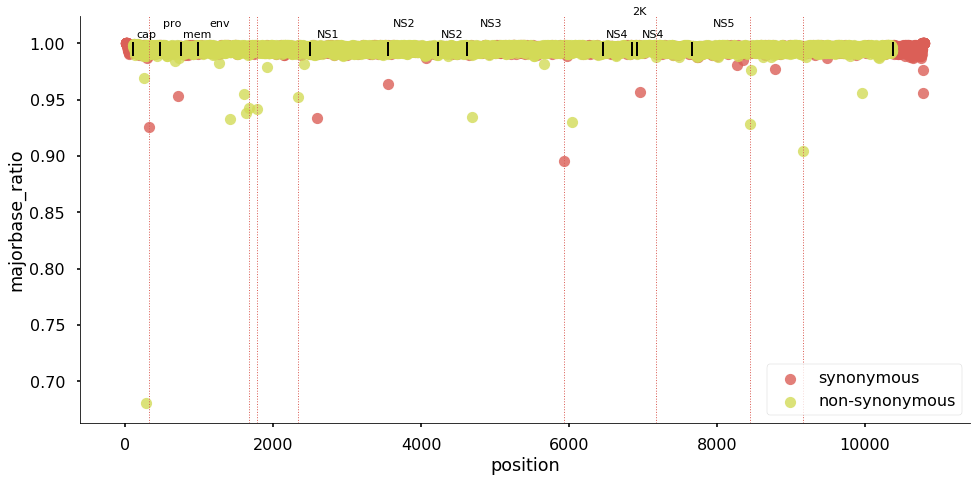

In [43]:
sns.lmplot( x="position", y="majorbase_ratio", data=DD51_A, fit_reg=False, hue='synonymous', legend=False, size=7, aspect=2) #, markers=DD3_A['synonymous'])
plt.legend(loc='lower right')
plot_positions()
plot_genes()
# giving title to the plot
#plt.title("Synonymous and non-synonymous polymorphisms, experiment A day 3");


### TLR3 activation, day 9

In [44]:
TD9_A['null'] = (TD9_A['secondbase_aa']).isnull()
def synonymous (row):
    if row['null'] or (row['consensus_aa']==row['secondbase_aa'] ):
        return "synonymous"  
    else:
        return "non-synonymous"
TD9_A['synonymous'] = TD9_A.apply (lambda row: synonymous (row),axis=1)


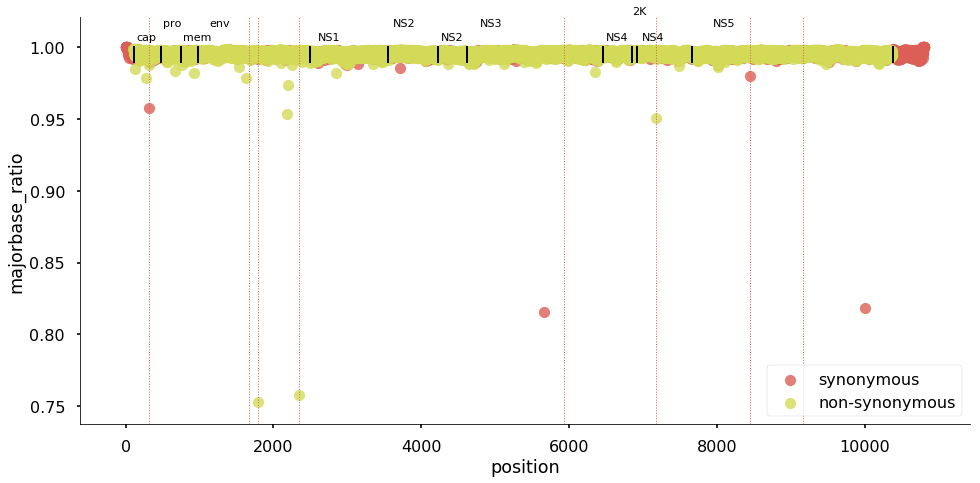

In [45]:
sns.lmplot( x="position", y="majorbase_ratio", data=TD9_A, fit_reg=False, hue='synonymous', legend=False, size=7, aspect=2) #, markers=DD3_A['synonymous'])
plt.legend(loc='lower right')
plot_positions()
plot_genes()
# giving title to the plot
#plt.title("Synonymous and non-synonymous polymorphisms, experiment A day 3");


### TLR3 activation, day 12

In [46]:
TD12_A['null'] = (TD12_A['secondbase_aa']).isnull()
def synonymous (row):
    if row['null'] or (row['consensus_aa']==row['secondbase_aa'] ):
        return "synonymous"  
    else:
        return "non-synonymous"
TD12_A['synonymous'] = TD12_A.apply (lambda row: synonymous (row),axis=1)


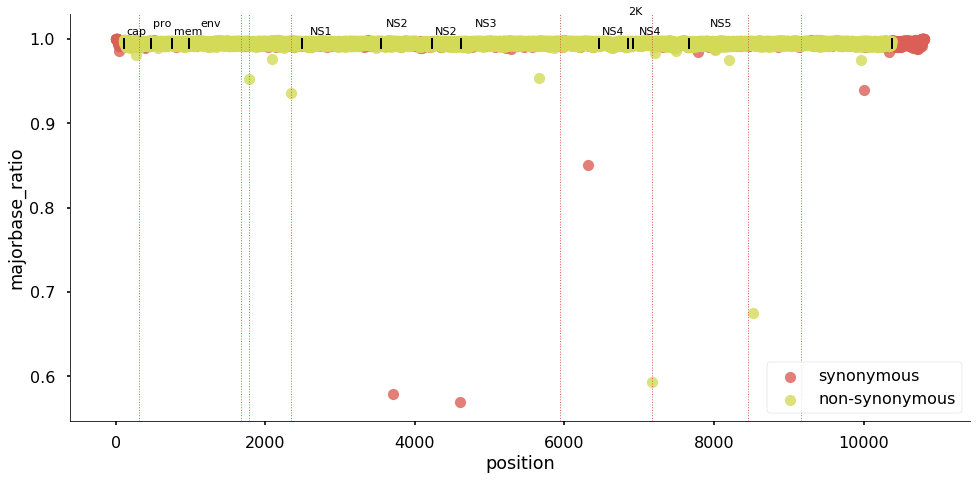

In [47]:
sns.lmplot( x="position", y="majorbase_ratio", data=TD12_A, fit_reg=False, hue='synonymous', legend=False, size=7, aspect=2) #, markers=DD3_A['synonymous'])
plt.legend(loc='lower right')
plot_positions()
plot_genes()
# giving title to the plot
#plt.title("Synonymous and non-synonymous polymorphisms, experiment A day 3");


### TLR3 activation, day 24

In [48]:
TD24_A['null'] = (TD24_A['secondbase_aa']).isnull()
def synonymous (row):
    if row['null'] or (row['consensus_aa']==row['secondbase_aa'] ):
        return "synonymous"  
    else:
        return "non-synonymous"
TD24_A['synonymous'] = TD24_A.apply (lambda row: synonymous (row),axis=1)


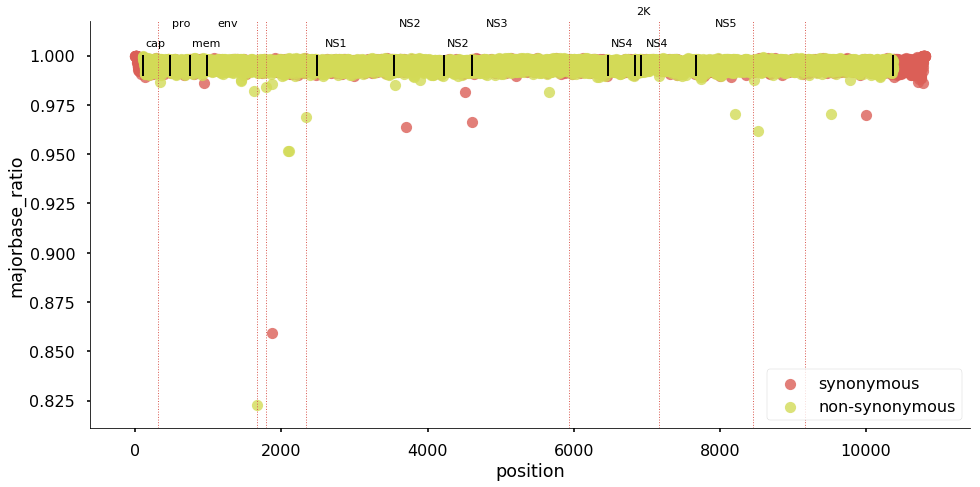

In [49]:
sns.lmplot( x="position", y="majorbase_ratio", data=TD24_A, fit_reg=False, hue='synonymous', legend=False, size=7, aspect=2) #, markers=DD3_A['synonymous'])
plt.legend(loc='lower right')
plot_positions()
plot_genes()
# giving title to the plot
#plt.title("Synonymous and non-synonymous polymorphisms, experiment A day 3");


### TLR3 activation, day 51

In [50]:
TD51_A['null'] = (TD51_A['secondbase_aa']).isnull()
def synonymous (row):
    if row['null'] or (row['consensus_aa']==row['secondbase_aa'] ):
        return "synonymous"  
    else:
        return "non-synonymous"
TD51_A['synonymous'] = TD51_A.apply (lambda row: synonymous (row),axis=1)


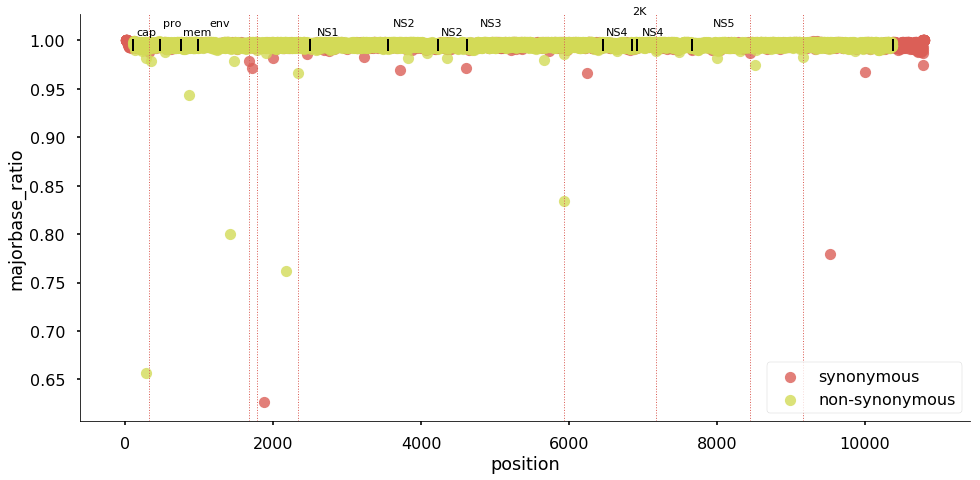

In [51]:
sns.lmplot( x="position", y="majorbase_ratio", data=TD51_A, fit_reg=False, hue='synonymous', legend=False, size=7, aspect=2) #, markers=DD3_A['synonymous'])
plt.legend(loc='lower right')
plot_positions()
plot_genes()
# giving title to the plot
#plt.title("Synonymous and non-synonymous polymorphisms, experiment A day 3");


## Comparison of diversity between synonymous and non-synonymous mutations

### For replicate A, day 12

In [52]:
#DD12_A['secondbase_ratio'].head()
#for i in range(len(DD12_A['secondbase_ratio'])):
#    if ("nan" in DD12_A['secondbase_ratio'][i]):
#        DD12_A.loc['secondbase_ratio',i] = 0.0
#pd.to_numeric(DD12_A['secondbase_ratio'])

Median values of the frequency per type of mutation:
[ 0.003189   0.0025525]
Mean values of the frequency per type of mutation:
[ 0.00341898  0.00339111]


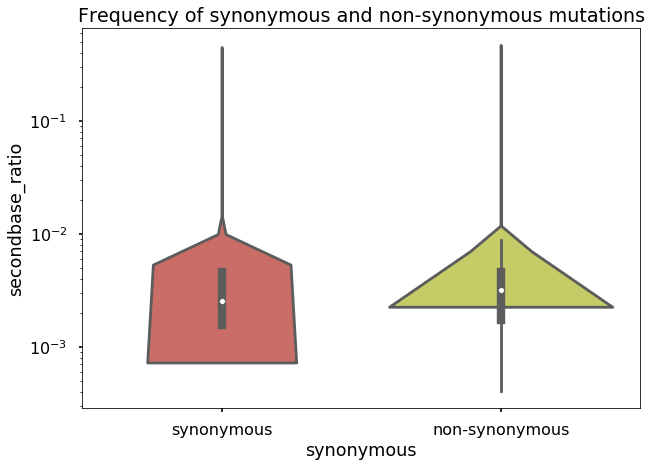

In [53]:
f, ax = plt.subplots(figsize=(10, 7))
ax.set(yscale="log")
sns.violinplot(x='synonymous', y='secondbase_ratio', data=DD12_A,  ax=ax, bw=0.2)

# giving title to the plot
plt.title("Frequency of synonymous and non-synonymous mutations");

medians = DD12_A.groupby(['synonymous'])['secondbase_ratio'].median().values
print("Median values of the frequency per type of mutation:" )
print(medians)
means = DD12_A.groupby(['synonymous'])['secondbase_ratio'].mean().values
print("Mean values of the frequency per type of mutation:" )
print(means)


Non synonymous mutations are a bit less frequent than synonymous ones.

### For replicate A, day 24

Median values of the diversity per type of mutation:
[ 0.00481461  0.00433798]
Mean values of the diversity per type of mutation:
[ 0.00482452  0.00488924]


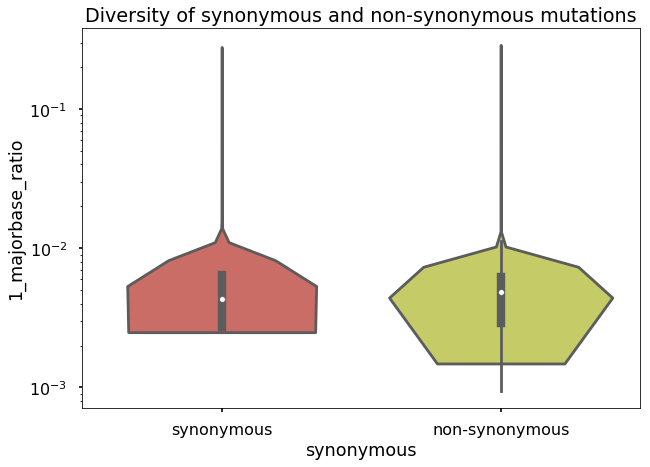

In [54]:
DD24_A['1_majorbase_ratio'] = 1.0 - DD24_A['majorbase_ratio']

f, ax = plt.subplots(figsize=(10, 7))
ax.set(yscale="log")
sns.violinplot(x='synonymous', y="1_majorbase_ratio", data=DD24_A,  ax=ax, bw=0.2)

# giving title to the plot
plt.title("Diversity of synonymous and non-synonymous mutations");

medians = DD24_A.groupby(['synonymous'])['1_majorbase_ratio'].median().values
print("Median values of the diversity per type of mutation:" )
print(medians)
means = DD24_A.groupby(['synonymous'])['1_majorbase_ratio'].mean().values
print("Mean values of the diversity per type of mutation:" )
print(means)


# Sequences around interesting positions, in replicate 1, day 12

In [55]:
def get_second_largest_base (li, cons):
    consensus = cons.replace(" ","")
    if consensus=="A":
        li[0] = -1
    elif consensus=="C":
        li[1] = -1
    elif consensus=="G":
        li[2] = -1
    elif consensus=="T":
        li[3] = -1
    if li[0]==li[1]==li[2]==li[3]:
        return "N"
    if max(li) == li[0]:
        return "A"
    elif max(li) == li[1]:
        return "C"
    elif max(li) == li[2]:
        return "G"
    else :
        return "T"

def extract_sequences_around_position(position, dataframe, length):
    d=pd.DataFrame()
    d['consensus_sequence'] = (dataframe['majorsequence'][position-length:position+length])
    d['consensus_sequence_aa'] = (dataframe['consensus_aa'][position-length:position+length])
    d['mutated_sequence'] = (dataframe['majorsequence'][position-length:position+length])
    d['mutated_sequence'][position] = get_second_largest_base([dataframe['qAs'][position],dataframe['qCs'][position],dataframe['qGs'][position],dataframe['qTs'][position]], dataframe['majorsequence'][position])
    d['mutated_sequence_aa'] = d['consensus_sequence_aa']
    d['mutated_sequence_aa'][position] = dataframe['secondbase_aa'][position]
    print(d)
    


In [57]:
for i in positions:
    extract_sequences_around_position(i, DD12_A, 20)

    consensus_sequence consensus_sequence_aa mutated_sequence  \
296                  G                     G                G   
297                  G                     G                G   
298                  T                     G                T   
299                  C                     L                C   
300                  T                     L                T   
301                  C                     L                C   
302                  A                     I                A   
303                  T                     I                T   
304                  C                     I                C   
305                  A                     N                A   
306                  A                     N                A   
307                  T                     N                T   
308                  A                     R                A   
309                  G                     R                G   
310                  A   